In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.enable_eager_execution()

# 선형

## Gradient Descent

In [3]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)


In [5]:
learning_rate=tf.Variable(0.01) # step 크기

for i in range(300):
    with tf.GradientTape() as tape:
        H = W * x_data + b
        cost = tf.reduce_mean(tf.square(H - y_data))

    W_grad, b_grad = tape.gradient(cost,[W,b])      # gradient함수는 첫번째 인자인 cost라는 함수에 대해 W와b 의 그레디언트 값을 반환한다.

    W.assign_sub(learning_rate * W_grad)  # A.assign_sub(B)  =>  A = A-B 즉, A-=B.   계속 값을 업데이트
    b.assign_sub(learning_rate * b_grad)  # 그라디언트값이 크면 좀더 많이 뛸 수 있다. 그래야 최소값에 빨리 도착할 수 있으니까!   
    
    if i % 10 ==0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost.numpy()))

    0|    1.0048|  -0.01733|  0.000055
   10|    1.0046|  -0.01675|  0.000051
   20|    1.0045|  -0.01619|  0.000048
   30|    1.0043|  -0.01566|  0.000045
   40|    1.0042|  -0.01513|  0.000042
   50|    1.0041|  -0.01463|  0.000039
   60|    1.0039|  -0.01414|  0.000037
   70|    1.0038|  -0.01367|  0.000034
   80|    1.0037|  -0.01322|  0.000032
   90|    1.0035|  -0.01278|  0.000030
  100|    1.0034|  -0.01235|  0.000028
  110|    1.0033|  -0.01194|  0.000026
  120|    1.0032|  -0.01154|  0.000024
  130|    1.0031|  -0.01116|  0.000023
  140|    1.0030|  -0.01079|  0.000021
  150|    1.0029|  -0.01043|  0.000020
  160|    1.0028|  -0.01008|  0.000019
  170|    1.0027| -0.009744|  0.000017
  180|    1.0026|  -0.00942|  0.000016
  190|    1.0025| -0.009106|  0.000015
  200|    1.0024| -0.008803|  0.000014
  210|    1.0024|  -0.00851|  0.000013
  220|    1.0023| -0.008227|  0.000012
  230|    1.0022| -0.007953|  0.000012
  240|    1.0021| -0.007688|  0.000011
  250|    1.0021| -0.0074

초기값을 잘못 설정하게 되면, cost함수가 convex형이 아니라면 전체에서 W,b의 최소값을 찾을 수 없다.

## Multi_variable linear regression

In [243]:
x1 = [73.,93.,89.,96.,73.]
x2 = [80.,88.,91.,98.,66.]
x3 = [75.,93.,90.,100.,70.]

Y = [152.,185.,180.,196.,142.]

w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))



In [22]:
learning_rate = 0.000001
for i in range(1000+1):
    with tf.GradientTape() as tape:
        H = w1*x1 + w2*x2 + w3*x3 + b
        cost = tf.reduce_mean(tf.square(H-Y))
        
    w1_grad,w2_grad,w3_grad,b_grad = tape.gradient(cost,[w1,w2,w3,b])

    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i %100==0:
        print("{:5}|{:12.4f}".format(i,cost.numpy()))

    0|   1593.1958
  100|      3.0903
  200|      2.8917
  300|      2.8889
  400|      2.8862
  500|      2.8835
  600|      2.8808
  700|      2.8781
  800|      2.8754
  900|      2.8727
 1000|      2.8700


### 행렬로 구현해보기

In [244]:
data = np.transpose(np.array([x1,x2,x3,Y]))
data = data.astype("float32")
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.]], dtype=float32)

In [245]:
X = data[:,:-1]
Y = data[:,[-1]]

In [246]:
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))


In [247]:
# prediction func
def hypothesis(X):
    return tf.matmul(X,W) + b

In [249]:
learning_rate = 0.00001
for i in range(2000+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(hypothesis(X)-Y)))
        
    W_grad, b_grad = tape.gradient(cost,[W,b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i %100==0:
        print("{:5}|{:12.4f}".format(i,cost.numpy()))

    0|      7.7154
  100|      7.6133
  200|      7.5151
  300|      7.4208
  400|      7.3299
  500|      7.2425
  600|      7.1582
  700|      7.0771
  800|      6.9987
  900|      6.9232
 1000|      6.8503
 1100|      6.7799
 1200|      6.7117
 1300|      6.6459
 1400|      6.5821
 1500|      6.5205
 1600|      6.4607
 1700|      6.4027
 1800|      6.3464
 1900|      6.2918
 2000|      6.2388


## 로지스틱

Cost Function

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(H) - (1- Y)*tf.log(1-H))

In [175]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))


W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [21]:
def logistic_regression(features):
    H = tf.divide(1.,1.+tf.exp(tf.matmul(features, W)+b))
    return H

In [22]:
def loss_fn(H, labels):
    cost = -tf.reduce_mean(labels*tf.math.log(H)+(1-labels)*tf.math.log(1-H))
    return cost

In [23]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),labels)
    return tape.gradient(loss_value, [W,b])

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [27]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.3494
Iter: 100, Loss: 0.3440
Iter: 200, Loss: 0.3388
Iter: 300, Loss: 0.3337
Iter: 400, Loss: 0.3287
Iter: 500, Loss: 0.3238
Iter: 600, Loss: 0.3191
Iter: 700, Loss: 0.3145
Iter: 800, Loss: 0.3100
Iter: 900, Loss: 0.3056
Iter: 1000, Loss: 0.3013
Testset Accuracy: 1.0000


In [25]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

## Softmax Regression

In [3]:

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [4]:
nb_classes = 3

In [7]:
W = tf.Variable(tf.random.normal((4, nb_classes)),name = 'weight')
b = tf.Variable(tf.random.normal((1,nb_classes)),name='bias')
variables = [W,b]
print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.40729985, -0.73095536, -0.55600214],
       [-0.96231914,  0.26695555,  2.4163544 ],
       [-1.3048412 ,  1.2742552 , -0.80840886],
       [-0.6584339 , -0.40664473,  0.45623916]], dtype=float32)> <tf.Variable 'bias:0' shape=(1, 3) dtype=float32, numpy=array([[0.5525866 , 0.659154  , 0.07595671]], dtype=float32)>


In [8]:
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X,W)+b)

print(hypothesis(x_data))

tf.Tensor(
[[9.1521977e-04 6.4660877e-02 9.3442386e-01]
 [6.2857772e-04 9.3066877e-01 6.8702608e-02]
 [8.5212773e-04 6.6881251e-01 3.3033538e-01]
 [1.7406224e-05 9.7879457e-01 2.1188013e-02]
 [7.1684249e-14 1.9571670e-04 9.9980432e-01]
 [1.0550339e-07 7.9338682e-01 2.0661312e-01]
 [4.1753309e-13 5.6554205e-03 9.9434459e-01]
 [2.8519875e-15 2.2398906e-03 9.9776006e-01]], shape=(8, 3), dtype=float32)


In [9]:
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

In [11]:
def cost_fn(X,Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y*tf.math.log(logits),axis=1)
    cost_mean =  tf.reduce_mean(cost)
    
    return cost_mean

print(cost_fn(x_data,y_data))

tf.Tensor(9.330042, shape=(), dtype=float32)


In [13]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)   # 상수형 텐서를 변수형 텐서처럼 바꿔준다.
    y= x*x      # 미분하면 2x니까 x에 3을 넣으면 6이 된다는 것을 보여주는 예시
    
dy_dx = tape.gradient(y,x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [14]:
def grad_fn(X,Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X,Y)
        grads = tape.gradient(loss,variables)
        
        return grads

print(grad_fn(x_data,y_data))

[<tf.Tensor: id=138, shape=(4, 3), dtype=float32, numpy=
array([[-0.24940018,  0.33113652, -0.08173636],
       [-1.6245838 , -0.70683086,  2.3314147 ],
       [-1.6243193 , -0.15317476,  1.7774941 ],
       [-1.6242914 , -0.21173342,  1.8360248 ]], dtype=float32)>, <tf.Tensor: id=137, shape=(1, 3), dtype=float32, numpy=array([[-0.24969831,  0.05555181,  0.19414648]], dtype=float32)>]


In [17]:
def fit(X,Y, epochs=2000,verbose=100):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    
    for i in range(epochs):
        grads = grad_fn(X,Y)
        optimizer.apply_gradients(zip(grads, variables))
        if(i==0) | ((i+1)%verbose ==0):
            print("Loss at epoch %d: %f" %(i+1,cost_fn(X,Y).numpy()))
            
fit(x_data, y_data)

Loss at epoch 1: 6.059923
Loss at epoch 100: 0.751996
Loss at epoch 200: 0.655748
Loss at epoch 300: 0.593954
Loss at epoch 400: 0.542366
Loss at epoch 500: 0.494552
Loss at epoch 600: 0.448283
Loss at epoch 700: 0.402605
Loss at epoch 800: 0.357078
Loss at epoch 900: 0.311737
Loss at epoch 1000: 0.268408
Loss at epoch 1100: 0.239998
Loss at epoch 1200: 0.227840
Loss at epoch 1300: 0.217095
Loss at epoch 1400: 0.207273
Loss at epoch 1500: 0.198263
Loss at epoch 1600: 0.189970
Loss at epoch 1700: 0.182313
Loss at epoch 1800: 0.175224
Loss at epoch 1900: 0.168643
Loss at epoch 2000: 0.162518


## softmax classifier

In [70]:
xy = np.loadtxt('data_04_zoo.csv', delimiter=',', dtype=np.float32)

In [20]:
xy

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 6.],
       [0., 1., 1., ..., 0., 0., 1.]], dtype=float32)

In [21]:
x_data = xy[:, 0:-1]
y_data = xy[:, -1]  # 데이터는 y가 원핫이 아니다 



In [26]:
nb_classes = 7  # y 데이터가 0~6까지의 값으로 구분되어 있다
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

In [43]:
W = tf.Variable(tf.random.normal((16,nb_classes)),name='weight')  #17-1
b = tf.Variable(tf.random.normal((nb_classes,)),name='bias')
variables = [W,b]

In [44]:
def logit_fn(X):
    return tf.matmul(X,W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X,Y):
    logits = logit_fn(X)
    cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                       labels=Y)
    cost = tf.reduce_mean(cost_i)
    return cost

def grad_fn(X,Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X,Y)
        grads = tape.gradient(loss,variables)
        return grads
    
def prediction(X,Y):
    pred = tf.argmax(hypothesis(X),1)
    correct_prediction = tf.equal(pred, tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy
    

In [48]:
def fit(X,Y,epochs=1000,verbose=100):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    
    for i in range(epochs):
        grads = grad_fn(X,Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):

            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 0.41749024391174316, Acc: 0.8613861203193665
Steps: 100 Loss: 0.4039740562438965, Acc: 0.8613861203193665
Steps: 200 Loss: 0.3911203444004059, Acc: 0.8910890817642212
Steps: 300 Loss: 0.3789897859096527, Acc: 0.9009901285171509
Steps: 400 Loss: 0.36751440167427063, Acc: 0.9009901285171509
Steps: 500 Loss: 0.3566357493400574, Acc: 0.9009901285171509
Steps: 600 Loss: 0.34630370140075684, Acc: 0.9009901285171509
Steps: 700 Loss: 0.3364744186401367, Acc: 0.9009901285171509
Steps: 800 Loss: 0.327109694480896, Acc: 0.9009901285171509
Steps: 900 Loss: 0.318175733089447, Acc: 0.9009901285171509
Steps: 1000 Loss: 0.3096427619457245, Acc: 0.9108911156654358


## 오버피팅 방지

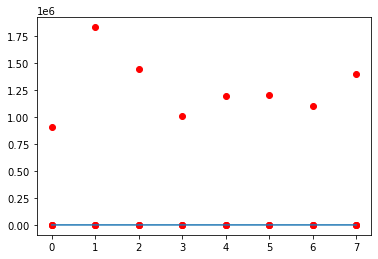

In [51]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

데이터 크기의 격차가 너무 크기 때문에 정규화를 해주자

In [53]:
def normalization(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    return numerator / denominator

In [55]:
xy = normalization(xy)

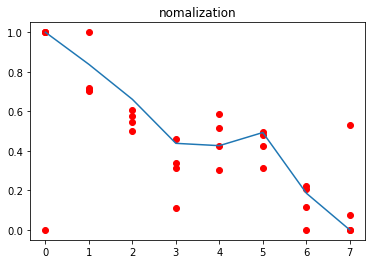

In [61]:
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.title("nomalization")
plt.show()

In [66]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [68]:
W = tf.Variable(tf.random_normal([4,1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

In [84]:
def linearReg_fn(features):
    H = tf.matmul(features,W)+b
    return H

def l2_loss(loss,beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss=tf.reduce_mean(loss + W_reg * beta)
    return loss
    

def loss_fn(H,labels,flag = False):
    cost = tf.reduce_mean(tf.square(H-labels))
    if(flag):
        cost = l2_loss(cost)
    return cost


In [95]:
is_decay = True
starter_learning_rate=0.1

if(is_decay):
    global_step = tf.Variable(0, trainable = False)
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
else:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=starter_learning_rate)


In [96]:
def grad(features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),labels, l2_flag)
    return tape.gradient(loss_value,[W,b]),loss_value

In [97]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]), global_step=global_step)
    if step % 10 == 0:
        print("Iter: {}, Loss: {:2.4f}, Learning Rate : {:2.8f}".format(step, loss_value, optimizer._learning_rate()))

Iter: 0, Loss: 0.0122, Learning Rate : 0.10000000
Iter: 10, Loss: 0.0121, Learning Rate : 0.10000000
Iter: 20, Loss: 0.0120, Learning Rate : 0.10000000
Iter: 30, Loss: 0.0119, Learning Rate : 0.10000000
Iter: 40, Loss: 0.0117, Learning Rate : 0.10000000
Iter: 50, Loss: 0.0116, Learning Rate : 0.09600000
Iter: 60, Loss: 0.0115, Learning Rate : 0.09600000
Iter: 70, Loss: 0.0114, Learning Rate : 0.09600000
Iter: 80, Loss: 0.0113, Learning Rate : 0.09600000
Iter: 90, Loss: 0.0112, Learning Rate : 0.09600000
Iter: 100, Loss: 0.0111, Learning Rate : 0.09216000


In [260]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [263]:
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [264]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [283]:
train_images = train_images /255.0
test_images = test_images /255.0

In [269]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [271]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [273]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.4969 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 17s 281us/sample - loss: 0.3726 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 18s 292us/sample - loss: 0.3340 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3080 - acc: 0.8865
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2926 - acc: 0.8924


In [ ]:
test_loss,test_acc = model.evaluate(test_images, test_labels)

In [275]:
predictions = model.predict(test_images)

In [276]:
np.argmax(predictions[0])

9